In [55]:
!pip install plotly
!pip install pandas
!pip install matplotlib

import pandas as pd
from datetime import datetime

# For plotting at the end
import plotly.offline as go_offline
import plotly.graph_objects as go

In [56]:
confirmed_url = "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv"
recovered_url = "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv"

def combine_region(row):
    province = row["Province/State"]
    country = row["Country/Region"]
    
    if province == country:
        return province
    
    if province != '':
        return province + ', ' + country
    
    return country


def clean_df(df):
    # Tranpose so that the provinces/cities are in the column headers
    df = df.T
    
    # Replace NaN with "" (to combine the Province/State and Country/Region later)
    df.fillna("", inplace=True)
    
    # Combine Province/State and Country/Region data and make them the columns
    df.columns = df.loc[['Province/State', 'Country/Region']].apply(combine_region)
    
    # Drop the Province/State, Country/Region rows now that the columns are created
    df.drop(
        ['Province/State','Country/Region','Lat','Long']\
        ,axis=0, inplace=True)
    return df

def to_datetime(df):    
    # Change index to datetime type
    df.index = pd.to_datetime(df.index)
    
    # Fill empty spaces with 0 value
    df = df.replace('', 0).astype(int)
    return df

confirmed = pd.read_csv(confirmed_url)
confirmed = clean_df(confirmed)
confirmed.head()

,"Anhui, Mainland China","Beijing, Mainland China","Chongqing, Mainland China","Fujian, Mainland China","Gansu, Mainland China","Guangdong, Mainland China","Guangxi, Mainland China","Guizhou, Mainland China","Hainan, Mainland China","Hebei, Mainland China",...,Egypt,Iran,"Ashland, NE, US","Travis, CA, US","From Diamond Princess, Australia","Lackland, TX, US","From Diamond Princess, Israel","None, Lebanon","Humboldt County, CA, US","Sacramento County, CA, US"
1/22/20,1,14,6,1,0,26,2,1,4,1,...,0,0,0,0,0,0,0,0,0,0
1/23/20,9,22,9,5,2,32,5,3,5,1,...,0,0,0,0,0,0,0,0,0,0
1/24/20,15,36,27,10,2,53,23,3,8,2,...,0,0,0,0,0,0,0,0,0,0
1/25/20,39,41,57,18,4,78,23,4,19,8,...,0,0,0,0,0,0,0,0,0,0
1/26/20,60,68,75,35,7,111,36,5,22,13,...,0,0,0,0,0,0,0,0,0,0


In [57]:
confirmed.head()

,"Anhui, Mainland China","Beijing, Mainland China","Chongqing, Mainland China","Fujian, Mainland China","Gansu, Mainland China","Guangdong, Mainland China","Guangxi, Mainland China","Guizhou, Mainland China","Hainan, Mainland China","Hebei, Mainland China",...,Egypt,Iran,"Ashland, NE, US","Travis, CA, US","From Diamond Princess, Australia","Lackland, TX, US","From Diamond Princess, Israel","None, Lebanon","Humboldt County, CA, US","Sacramento County, CA, US"
1/22/20,1,14,6,1,0,26,2,1,4,1,...,0,0,0,0,0,0,0,0,0,0
1/23/20,9,22,9,5,2,32,5,3,5,1,...,0,0,0,0,0,0,0,0,0,0
1/24/20,15,36,27,10,2,53,23,3,8,2,...,0,0,0,0,0,0,0,0,0,0
1/25/20,39,41,57,18,4,78,23,4,19,8,...,0,0,0,0,0,0,0,0,0,0
1/26/20,60,68,75,35,7,111,36,5,22,13,...,0,0,0,0,0,0,0,0,0,0


In [58]:
confirmed = to_datetime(confirmed)
confirmed.head()

,"Anhui, Mainland China","Beijing, Mainland China","Chongqing, Mainland China","Fujian, Mainland China","Gansu, Mainland China","Guangdong, Mainland China","Guangxi, Mainland China","Guizhou, Mainland China","Hainan, Mainland China","Hebei, Mainland China",...,Egypt,Iran,"Ashland, NE, US","Travis, CA, US","From Diamond Princess, Australia","Lackland, TX, US","From Diamond Princess, Israel","None, Lebanon","Humboldt County, CA, US","Sacramento County, CA, US"
2020-01-22,1,14,6,1,0,26,2,1,4,1,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,9,22,9,5,2,32,5,3,5,1,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,15,36,27,10,2,53,23,3,8,2,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,39,41,57,18,4,78,23,4,19,8,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,60,68,75,35,7,111,36,5,22,13,...,0,0,0,0,0,0,0,0,0,0


### Number of new cases per day

In [59]:
confirmed.diff().head()

,"Anhui, Mainland China","Beijing, Mainland China","Chongqing, Mainland China","Fujian, Mainland China","Gansu, Mainland China","Guangdong, Mainland China","Guangxi, Mainland China","Guizhou, Mainland China","Hainan, Mainland China","Hebei, Mainland China",...,Egypt,Iran,"Ashland, NE, US","Travis, CA, US","From Diamond Princess, Australia","Lackland, TX, US","From Diamond Princess, Israel","None, Lebanon","Humboldt County, CA, US","Sacramento County, CA, US"
2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-23,8.0,8.0,3.0,4.0,2.0,6.0,3.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-24,6.0,14.0,18.0,5.0,0.0,21.0,18.0,0.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-25,24.0,5.0,30.0,8.0,2.0,25.0,0.0,1.0,11.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-26,21.0,27.0,18.0,17.0,3.0,33.0,13.0,1.0,3.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Average number of new cases per day

In [60]:
number_of_days = (confirmed.index[-1]-confirmed.index[0]).days
number_of_days

30

In [61]:
speed = confirmed.diff().sum().to_frame(name="Cases/day")/number_of_days
speed.iloc[23:29]

,Cases/day
"Shanghai, Mainland China",10.833333
"Shanxi, Mainland China",4.366667
"Sichuan, Mainland China",17.333333
"Tianjin, Mainland China",4.266667
"Tibet, Mainland China",0.033333
"Xinjiang, Mainland China",2.533333


### Top 5 places with the most average new cases per day

In [62]:
speed.nlargest(5, "Cases/day")

,Cases/day
"Hubei, Mainland China",2073.933333
"Guangdong, Mainland China",43.566667
"Henan, Mainland China",42.066667
"Zhejiang, Mainland China",39.766667
"Hunan, Mainland China",33.566667


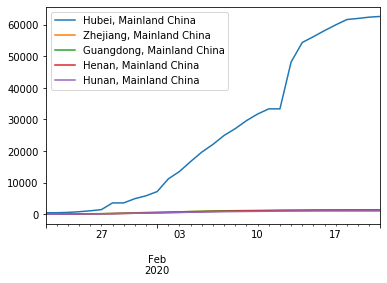

In [63]:
confirmed[['Hubei, Mainland China','Zhejiang, Mainland China','Guangdong, Mainland China',\
       'Henan, Mainland China','Hunan, Mainland China']].plot()

### Since Hubei region is so dominant regarding the number of virus cases, the other 4 areas are shown in a separate plot to see the differences more clearly.

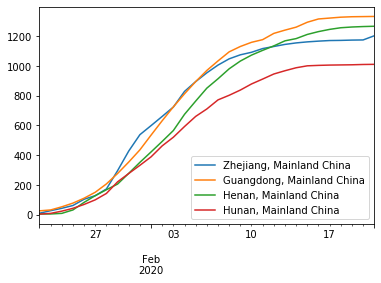

In [64]:
confirmed[['Zhejiang, Mainland China','Guangdong, Mainland China',\
       'Henan, Mainland China','Hunan, Mainland China']].plot()

## Recoveries data

In [65]:
recovered = pd.read_csv(recovered_url)

recovered = clean_df(recovered)
recovered.head()

,"Anhui, Mainland China","Beijing, Mainland China","Chongqing, Mainland China","Fujian, Mainland China","Gansu, Mainland China","Guangdong, Mainland China","Guangxi, Mainland China","Guizhou, Mainland China","Hainan, Mainland China","Hebei, Mainland China",...,Egypt,Iran,"Ashland, NE, US","Travis, CA, US","From Diamond Princess, Australia","Lackland, TX, US","From Diamond Princess, Israel","None, Lebanon","Humboldt County, CA, US","Sacramento County, CA, US"
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/24/20,0,1,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/25/20,0,2,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/26/20,0,2,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
recovered = to_datetime(recovered)

In [67]:
recovered.head()

,"Anhui, Mainland China","Beijing, Mainland China","Chongqing, Mainland China","Fujian, Mainland China","Gansu, Mainland China","Guangdong, Mainland China","Guangxi, Mainland China","Guizhou, Mainland China","Hainan, Mainland China","Hebei, Mainland China",...,Egypt,Iran,"Ashland, NE, US","Travis, CA, US","From Diamond Princess, Australia","Lackland, TX, US","From Diamond Princess, Israel","None, Lebanon","Humboldt County, CA, US","Sacramento County, CA, US"
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,1,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,2,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,2,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Recoveries Rate in general

In [68]:
no_of_recoveries = recovered.iloc[[-1]]
no_of_recoveries

,"Anhui, Mainland China","Beijing, Mainland China","Chongqing, Mainland China","Fujian, Mainland China","Gansu, Mainland China","Guangdong, Mainland China","Guangxi, Mainland China","Guizhou, Mainland China","Hainan, Mainland China","Hebei, Mainland China",...,Egypt,Iran,"Ashland, NE, US","Travis, CA, US","From Diamond Princess, Australia","Lackland, TX, US","From Diamond Princess, Israel","None, Lebanon","Humboldt County, CA, US","Sacramento County, CA, US"
2020-02-21,539,169,316,149,76,690,97,77,95,184,...,0,0,0,0,0,0,0,0,0,0


In [69]:
no_of_cfm = confirmed.iloc[[-1]]
no_of_cfm

,"Anhui, Mainland China","Beijing, Mainland China","Chongqing, Mainland China","Fujian, Mainland China","Gansu, Mainland China","Guangdong, Mainland China","Guangxi, Mainland China","Guizhou, Mainland China","Hainan, Mainland China","Hebei, Mainland China",...,Egypt,Iran,"Ashland, NE, US","Travis, CA, US","From Diamond Princess, Australia","Lackland, TX, US","From Diamond Princess, Israel","None, Lebanon","Humboldt County, CA, US","Sacramento County, CA, US"
2020-02-21,988,396,572,293,91,1333,246,146,168,308,...,1,18,11,5,4,2,1,1,1,1


In [70]:
recovery_rate = ((no_of_recoveries/no_of_cfm) * 100).T
recovery_rate.head(8)

,2020-02-21 00:00:00
"Anhui, Mainland China",54.554656
"Beijing, Mainland China",42.676768
"Chongqing, Mainland China",55.244755
"Fujian, Mainland China",50.853242
"Gansu, Mainland China",83.516484
"Guangdong, Mainland China",51.762941
"Guangxi, Mainland China",39.430894
"Guizhou, Mainland China",52.739726


## Positive recoveries rate

In [71]:
positive_rate = recovery_rate[recovery_rate.iloc[:, 0] > 0].sort_values(
    by=recovery_rate.columns[0], ascending=False)
positive_rate.tail()

,2020-02-21 00:00:00
"Hubei, Mainland China",18.960455
South Korea,7.843137
Taiwan,7.692308
Hong Kong,7.352941
"Diamond Princess cruise ship, Others",0.157729


## Total confirmed cases in each area

In [72]:
no_of_cfm = no_of_cfm.transpose()

In [73]:
no_of_cfm.index.names = ['Place']
no_of_cfm.columns = [str(no_of_cfm.columns[0]) + ' Confirmed']
no_of_cfm.head()

,2020-02-21 00:00:00 Confirmed
Place,
"Anhui, Mainland China",988
"Beijing, Mainland China",396
"Chongqing, Mainland China",572
"Fujian, Mainland China",293
"Gansu, Mainland China",91


## Total recovered cases in each area

In [74]:
no_of_recoveries = no_of_recoveries.transpose()

In [75]:
no_of_recoveries.index.names = ['Place']
no_of_recoveries.columns = [str(no_of_recoveries.columns[0]) + ' Recovered']

In [76]:
no_of_recoveries.head()

,2020-02-21 00:00:00 Recovered
Place,
"Anhui, Mainland China",539
"Beijing, Mainland China",169
"Chongqing, Mainland China",316
"Fujian, Mainland China",149
"Gansu, Mainland China",76


## Number of confirmed and recovered cases with the recovered cases in descending order

In [77]:
summary = no_of_cfm.merge(no_of_recoveries, on='Place')\
.sort_values(by=list(no_of_recoveries.columns), ascending=False)
summary['Recovery rate'] = recovery_rate

In [78]:
summary.head()

,2020-02-21 00:00:00 Confirmed,2020-02-21 00:00:00 Recovered,Recovery rate
Place,,,
"Hubei, Mainland China",62662,11881,18.960455
"Henan, Mainland China",1267,736,58.089976
"Guangdong, Mainland China",1333,690,51.762941
"Zhejiang, Mainland China",1203,679,56.442228
"Hunan, Mainland China",1011,661,65.380811


## Region ranking according to the recovery rate

In [79]:
summary['Rank'] = summary['Recovery rate'].rank(method='max', ascending=False)
summary = summary.sort_values(by=['Rank'])

In [80]:
# Top 5 regions with the highest recovery rate
summary.head()

,2020-02-21 00:00:00 Confirmed,2020-02-21 00:00:00 Recovered,Recovery rate,Rank
Place,,,,
"Victoria, Australia",4,4,100.0,17.0
Finland,1,1,100.0,17.0
"Tibet, Mainland China",1,1,100.0,17.0
"New South Wales, Australia",4,4,100.0,17.0
"Qinghai, Mainland China",18,18,100.0,17.0


# ----------------------------------

## Plotting the Corona map
(use binder link at the repository [home page](https://github.com/tu-nguyen-tech/Corona-Virus-2020) to see the rendered map)

In [81]:
confirmed_url = "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv"
data = pd.read_csv(confirmed_url)

data.fillna("", inplace=True)
data.head()

# Combine region and country (since there are some empty spaces in the Province/State column)
def combine_region(row):
    province = row["Province/State"]
    country = row["Country/Region"]
    
    if province == country:
        return province
    
    if province == '':
        return country
    
    if province != country:
        return province + ', ' + country

data['Province/State'] = data.apply(combine_region, axis=1)

data.rename(columns={"Province/State": "Area"}, inplace=True)

data.replace('',0, inplace=True)

# Initiate variables
fig = go.Figure()
col_names = data.columns

# Looping for data splitting 
for i in range(4, len(data.columns)):
    df_split = data[['Lat','Long',
                   'Country/Region','Area',
                   col_names[i]]]
        
    df = df_split[(df_split[col_names[i]] != 0)].copy()
    lat = df['Lat']
    lon = df['Long']
    case = df[df.columns[-1]].astype(int)
    df['text'] = df['Area']+'<br>'+'confirmed cases: '+ case.astype(str)

    # Adding geoscatter plot
    fig.add_trace(go.Scattergeo(
        name = '',
        lon = lon,
        lat = lat,
        visible = False,
        hovertemplate = df['text'],
        text = df['text'],
        mode = 'markers',
        marker = {'size': 15,'opacity': 0.6,'color': 'Purple', 'symbol': 'circle'},
    ))

# Create slider
steps = []
for i in range(len(fig.data)):
    step = {
        "method": "restyle",
        "args": ["visible", [False] * len(fig.data)],
        "label": col_names[4:][i],
    }
    step["args"][1][i] = True  # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [{
    'active': 0,
    'currentvalue': {"prefix": "Date: "},
    'pad': {"t": 1},
    'steps': steps
}]

# Show data
fig.data[0].visible=True
fig.update_layout(sliders=sliders,title='Coronavirus Spreading Map'+'<br>geodose.com',height=600)
fig.show()